In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.optimizers import SGD

import csv


#numpy stretching and slicing    
    
#print size of data[0]
#Data [['year', 'month', 'u10', 'v10', 'mx2t', 'mn2t', 'tcc', 't2', 'msl', 't', 'q', 'u', 'v', 'z', 'SPI', 'grid_ID'],...]
#print((data[0]))

#a) SPI to Drought, SPI <=-1 is drought, SPI >-1 is no drought
#modify data list by adding drought variable, später vll entfernen erste zeile data[0]
#data[0].append('Drought')
#get rid of first row

#Data [['year', 'month', 'u10', 'v10', 'mx2t', 'mn2t', 'tcc', 't2', 'msl', 't', 'q', 'u', 'v', 'z', 'SPI', 'grid_ID','Drought'],...]
#forbidden indices: SPI, Drought, year, grid_ID -> 14, 15, 0, 16

forbiddenColumns = [0, 14, 15, 16]

def drought(data):
    for x in data:
        try:
            if float(x[14]) <= -1:
                x.append(1)
            else:
                x.append(0)
        except:
            x.append('Drought')
    return data

'''
def check_np_empty_nonNum_values(data):
    for x in data:
        for y in x:
            try:
                float(y)
            except:
                index = np.where(data == x)
                #print the row
                print(index)
                data = np.delete(data, index, axis=0)
                break
    return data
'''
def checkNonFloatNonNP(data):
    for x in data:
        for y in x:
            try:
                float(y)
            except:
                print(y)
                data.remove(x)
                break

def filterInvalidMonthsNP(data):
    new_data = []
    validMonths = [1,2,3,4,5,6,7,8,9,10,11,12]
    for x in data:
        if x[1] in validMonths:
            new_data.append(x)
    return np.array(new_data)

def lineCount(data):
    count = 0
    for x in data:
        count += 1
    return count

def normaliseMonth(dataSet):
    new_dataSet = []
    for x in dataSet:
        month = x[1]
        month_normalised = 2 * np.pi * (month - 1) / 12
        x = np.append(x, [np.cos(month_normalised), np.sin(month_normalised)])
        #new_dataSet.append(np.delete(x, 1))
        new_dataSet.append(x)
    return np.array(new_dataSet)

def noIncludeInfinites(data):
    new_data = []
    detected = False
    for x in data:
        for y in x:
            if y == float('inf') or y == float('-inf'):
                detected = True
                break
        if detected == False:
            new_data.append(x)
    return np.array(new_data)

def detect_outliers(data):    
    # Calculate the mean and standard deviation for each column
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)
    
    
    # Calculate the Z-score for each data point
    z_scores = (data - mean) / std_dev
    
    # Identify outliers (Z-score > 3 or Z-score < -3)
    outliers = np.abs(z_scores) > 3
    #print(outliers)
    
    # Get the indices of the outliers
    outlier_indices = np.where(outliers)
    
    #count how many outliers
    count = 0
    for x in outliers:
        for y in x:
            if y == True:
                count += 1
                break
    print(count)
    
    county = 0
    for x in outlier_indices[1]:
        if x in forbiddenColumns:
            county += 1
    print(county)
    print(count-county)
    return outlier_indices

def detectOutliersByColumn(data, column):
    mean = np.mean(data[:, column])
    std_dev = np.std(data[:, column])
    z_scores = (data[:, column] - mean) / std_dev
    outliers = np.abs(z_scores) > 3
    outlier_indices = np.where(outliers)
    #count and print outlierindices
    #print(len(outlier_indices[0]))
    return outlier_indices

def removeOutliers(data, excludedColumns):
    outliersIndices = set()
    for i in range(0, len(data[0])):
        if i not in excludedColumns:
            outlierIndicesColumn = detectOutliersByColumn(data, i)
            for x in outlierIndicesColumn[0]:
                outliersIndices.add(x)

    outliersIndices = list(outliersIndices)
    outliersIndices.sort()
    #print(outliersIndices)
    data = np.delete(data, outliersIndices, axis=0)
    return data



with open('Climate_SPI.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))

data = drought(data)
print(data[0])
print(lineCount(data))
checkNonFloatNonNP(data)
print(lineCount(data))
#np array of data
data = np.array(data)
#preprossing 1, get rid of rows that contain empty values or non numeric values

#data = check_np_empty_nonNum_values(data)
print(lineCount(data))
data = data.astype(float)
#(b) Split your data into training, validation and test sets.
#split data into 80% training, 10% validation and 10% test, shuffle data

#np.random.shuffle(data)

#outliers = detect_outliers(data)
#print(outliers)



data = removeOutliers(data, forbiddenColumns)

print(lineCount(data))
print(data[999])
data = filterInvalidMonthsNP(data)
data = noIncludeInfinites(data)
data = normaliseMonth(data)
print(lineCount(data))
print(data[999])

#np.random.shuffle(data)




data = filterInvalidMonthsNP(data)
print(lineCount(data))



train_data = data[:int(0.8*len(data))]
val_data = data[int(0.8*len(data)):int(0.9*len(data))]
test_data = data[int(0.9*len(data)):]

print(lineCount(train_data)+lineCount(val_data)+lineCount(test_data))   



#print row of each
#print(train_data[0])

#print data type of each single val
#print(type(train_data[2][3]))
#(c) Pre-processing: Apply any necessary transformation to the trainingset, then apply the same transformation to the validation and test sets.
#convert data to float

#print(train_data[0])
#check for any empty values and non numeric values in a row and delete the row 

'''
def check_empty_values(data):
    
    
check_empty_values(train_data)
check_empty_values(val_data)    
check_empty_values(test_data)
'''
#– Normalise the month to the range [0, 2π] using: month normalised = 2π× (month - 1)/12., 
# replace ’month’ with two new predictors: ‘cos(month normalised)’ and ‘sin(month normalised)’.
#Data [['year', 'month', 'u10', 'v10', 'mx2t', 'mn2t', 'tcc', 't2', 'msl', 't', 'q', 'u', 'v', 'z', 'SPI', 'grid_ID','Drought', 'cosMonthNorm', 'sinMonthNorm],...]


#print(train_data[0])

#train_data = normaliseMonth(train_data)
#val_data = normaliseMonth(val_data)
#test_data = normaliseMonth(test_data)
#print(type(train_data[0][0]))
#print(train_data[0])






['year', 'month', 'u10', 'v10', 'mx2t', 'mn2t', 'tcc', 't2', 'msl', 't', 'q', 'u', 'v', 'z', 'SPI', 'grid_ID', 'Drought']
15121
year
15120
15120
14731
[ 1.98200000e+03  6.00000000e+00  6.57238476e-01  1.80842424e+00
  2.90487842e+02  2.78613574e+02  1.50551449e-01  2.83822708e+02
  1.02146522e+05  2.83121229e+02  4.04514790e-03 -4.02703925e-01
  1.22710012e-01  1.59993444e+03 -2.65131761e+00  3.33000000e+02
  1.00000000e+00]
14731
[ 1.98200000e+03  6.00000000e+00  6.57238476e-01  1.80842424e+00
  2.90487842e+02  2.78613574e+02  1.50551449e-01  2.83822708e+02
  1.02146522e+05  2.83121229e+02  4.04514790e-03 -4.02703925e-01
  1.22710012e-01  1.59993444e+03 -2.65131761e+00  3.33000000e+02
  1.00000000e+00 -8.66025404e-01  5.00000000e-01]
14731
14731


'\ndef check_empty_values(data):\n    \n    \ncheck_empty_values(train_data)\ncheck_empty_values(val_data)    \ncheck_empty_values(test_data)\n'

In [3]:
#Creating the neural network with TF
nnet = Sequential()
nnet.add(Dense(1, input_dim=2, activation='tanh'))
nnet.add(Dense(1, activation='linear'))

#Learning algorithm and learning rate
nnet.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01))

#Feedforward propagation, i.e., network output without training
ye = nnet.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/opt/anaconda3/envs/assignment1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


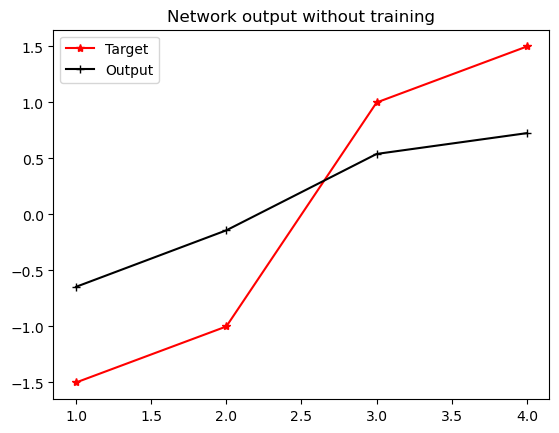

In [4]:
#Plotting network output without training
i=np.arange(1,5)
plt.plot(i,t,'r*-',label='Target')
plt.plot(i,ye,'k+-',label='Output')
plt.title('Network output without training')
plt.legend()
plt.show()

In [5]:
#Training the neural network
nnet.fit(np.array(x), np.array(t), batch_size=4, epochs = 500, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


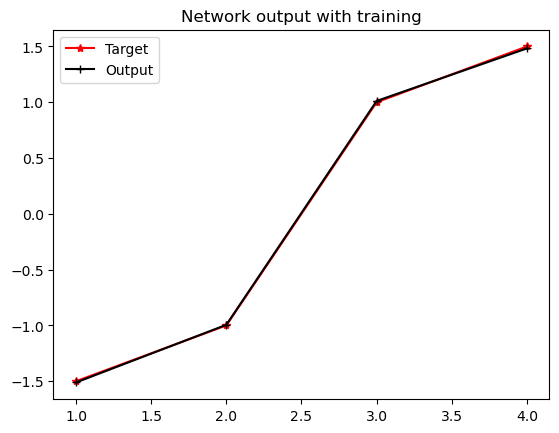

In [6]:
#Feedforward propagation, i.e., network output with training
yt = nnet.predict(x)

#Plotting network output with training
plt.plot(i,t,'r*-',label='Target')
plt.plot(i,yt,'k+-',label='Output')
plt.title('Network output with training')
plt.legend()
plt.show()
